In [1]:
#read libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 1. Data Preprocess

## 1.1 Check Main Dataset

In [2]:
app_train = pd.read_csv('application_train.csv')

In [3]:
app_test = pd.read_csv('application_test.csv')

In [4]:
print(app_train.shape,app_test.shape)

(307511, 122) (48744, 121)


In [5]:
app_train_target = app_train['TARGET']

In [6]:
app_train.shape

(307511, 122)

In [7]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## 1.2 Check Target distribution

In [9]:
target_percent = app_train_target.value_counts()/app_train_target.count()
target_percent

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

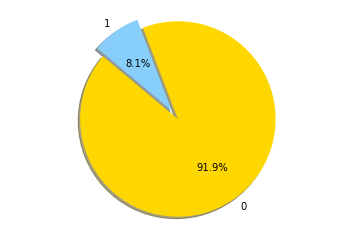

In [10]:
#plot data
labels = '0', '1'
sizes = [target_percent[0], target_percent[1]]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

#plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

The target is highly biased with most of people pay their on time and a very small portion of default records.

## 1.3 Check Missing Value

In [11]:
number_null = app_train.isnull().sum().sort_values(ascending=False)

In [12]:
percent_null = ((app_train.isnull().sum())/(app_train.isnull().count())*100).sort_values(ascending=False)

In [13]:
app_train_miss = pd.concat([number_null,percent_null], axis=1,keys =['Amount','Percent'])

In [19]:
temp=app_train_miss['Percent'].where(app_train_miss['Percent'] != 0).count()
print("There're %d columns have empty value in the training set"%(temp))

There're 67 columns have empty value in the training set


In [15]:
app_train_miss.head()

,Amount,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963


In [26]:
train_missing_col=app_train_miss.index.tolist()

In [16]:
number_null2 = app_test.isnull().sum().sort_values(ascending=False)

In [17]:
percent_null2 = ((app_test.isnull().sum())/(app_test.isnull().count())*100).sort_values(ascending=False)

In [18]:
app_test_miss = pd.concat([number_null2,percent_null2], axis=1,keys =['Amount','Percent'])

In [20]:
temp2=app_test_miss['Percent'].where(app_test_miss['Percent'] != 0).count()
print("There're %d columns have empty value in the test set"%(temp))

There're 67 columns have empty value in the test set


In [21]:
app_test_miss.head()

,Amount,Percent
COMMONAREA_MEDI,33495,68.716150
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523


In [27]:
test_missing_col=app_train_miss.index.tolist()

In [29]:
[x for x in train_missing_col if x not in test_missing_col]

[]

missing values in test set is all the columns in the training set, so we can simply drop the columns with over 50% missing values.

In [36]:
app_train_miss.loc[app_train_miss['Percent']>30]

,Amount,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


In [37]:
drop_col=app_train_miss.loc[app_train_miss['Percent']>30].index.tolist()

In [40]:
len(drop_col)

50

In [41]:
app_train_clean=app_train.drop(columns=drop_col)

In [42]:
app_test_clean=app_test.drop(columns=drop_col)

In [44]:
[x for x in train_missing_col if x not in drop_col]

['EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'NAME_TYPE_SUITE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_CREDIT',
 'FLAG_OWN_CAR',
 'FLAG_EMAIL',
 'TARGET',
 'FLAG_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_WORK_PHONE',
 'FLAG_EMP_PHONE',
 'FLAG_MOBIL',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_REALTY',
 'AMT_INCOME_TOTAL',
 'DAYS_ID_PUBLISH',
 'DAYS_REGISTRATION',
 'DAYS_EMPLOYED',
 'DAYS_BIRTH',
 'REGION_POPULATION_RELATIVE',
 'REGION_RATING_CLIENT',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE',
 'CNT_CHILDREN',
 'NAME_HOUSING_TYPE',
 'REG_REGION_NOT_LIVE_REGION',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'FL

In [45]:
app_train=app_train_clean.fillna(0)
app_test=app_test_clean.fillna(0)

drop columns with 30% missing value and fill the rest with 0.

## 1.4 Check Categorical Data

In [46]:
app_train.dtypes.value_counts()

int64      41
float64    20
object     11
dtype: int64

In [47]:
object_train = app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
object_test =app_test.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
compare_categorical = pd.concat([object_train,object_test], axis=1,keys =['Train','Test'])

In [48]:
compare_categorical 

,Train,Test
NAME_CONTRACT_TYPE,2,2
CODE_GENDER,3,2
FLAG_OWN_CAR,2,2
FLAG_OWN_REALTY,2,2
NAME_TYPE_SUITE,8,8
NAME_INCOME_TYPE,8,7
NAME_EDUCATION_TYPE,5,5
NAME_FAMILY_STATUS,6,5
NAME_HOUSING_TYPE,6,6
WEEKDAY_APPR_PROCESS_START,7,7


In [49]:
app_train=app_train[app_train.CODE_GENDER.isin(app_test.CODE_GENDER)]

In [50]:
app_train=app_train[app_train.NAME_INCOME_TYPE.isin(app_test.NAME_INCOME_TYPE)]

In [51]:
app_train=app_train[app_train.NAME_FAMILY_STATUS.isin(app_test.NAME_FAMILY_STATUS)]

Delete the rows that contains features not shown in the test set.

## 1.5 Encoding categorical variables

For any categorical variable (dtype == object) with 2 unique categories, we will use label encoding, and for any categorical variable with more than 2 unique categories, we will use one-hot encoding.

In [52]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

4 columns were label encoded.


In [53]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307500, 161)
Testing Features shape:  (48744, 160)


## 1.6 Abnormal value exist in DAYS_EMPLOYED

In [54]:
app_train['DAYS_EMPLOYED'].describe()

count    307500.000000
mean      63817.429333
std      141277.730537
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

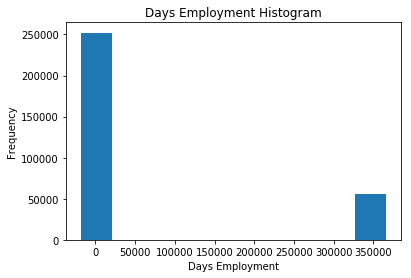

In [55]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

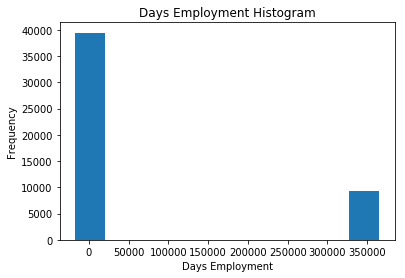

In [56]:
app_test['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [57]:
# set another variabel to denote whether a records is belong to that abonraml group or not
app_train['DAYS_EMPLOYED_abno'] = app_train['DAYS_EMPLOYED']==365243
app_test['DAYS_EMPLOYED_abno'] = app_test['DAYS_EMPLOYED']==365243

In [58]:
print(app_train.shape,app_test.shape)

(307500, 162) (48744, 161)


In [59]:
#set the abnormal value to nan
app_train['DAYS_EMPLOYED']=app_train['DAYS_EMPLOYED'].replace(365243, np.nan)
app_test['DAYS_EMPLOYED']=app_test['DAYS_EMPLOYED'].replace(365243, np.nan)

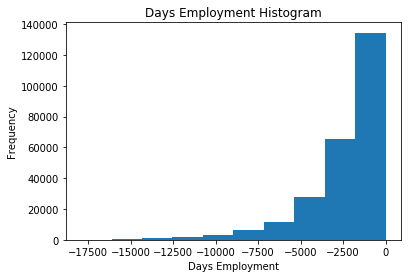

In [60]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

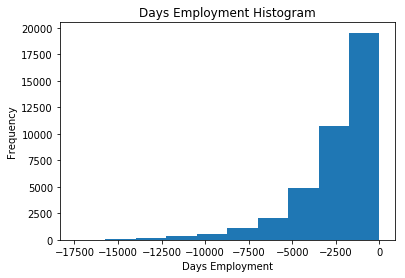

In [61]:
app_test['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [62]:
app_train=app_train[app_train['DAYS_EMPLOYED_abno'] == False].drop(columns='DAYS_EMPLOYED_abno')

In [63]:
app_test=app_test[app_test['DAYS_EMPLOYED_abno'] == False].drop(columns='DAYS_EMPLOYED_abno')

## 1.7 Join additional datasets

# 2. Feature engineering

# 3. Modeling

## 3.1 Xgboost

In [64]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [65]:
seed = 7
test_size = 0.33

X=app_train.iloc[:,2:]
y=app_train.iloc[:,1]

In [71]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=test_size, random_state=seed)

In [72]:
# fit model no training data
model = XGBClassifier()
#model.fit(X_train, y_train)


In [ ]:
model.fit(X_train, y_train)

In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]


In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))